### Library Imports

In [2]:
import matplotlib.pyplot as plt
from scipy.stats import bernoulli

### Defining States, Actions and Events 

In [24]:
states: range = range(0,51,1) # Total tickets
actions: range = range(5,400,10) # Prices that a ticket can be sold for.
time_stamps: range = range(0,200,1) 
events: list = [0,1] # Ticket is unsold or sold
probabilities: dict = {1: lambda action, time: (1 - (action / 400)) * ((1 + time) / 200),
                       0: lambda action, time: 1 - ((1 - (action / 400)) * ((1 + time) / 200))}
initial_state: int = 50
# Probabilities at a given state, for a particular action and time whether a ticket is sold or not.

### Utility functions

In [15]:
def reward_function(event: int, action: int, state: int) -> int:
    '''
    calculates reward for an action, for a particular event.
    '''
    return action * min(event,state)

def new_state(event: int,state: int) -> int:
    '''
    calculates the next state from the given current state, for a particular event.
    '''
    return max(0, state-event)

def probability_func(event: int, action: int, time: int) -> float:
    '''
    Gives the probability of happening of an event, here selling or not selling a ticket under given action and time.
    '''
    return probabilities[event](action,time)

def simulate_event(probability: float) -> int:
    '''
    Given a probability of happening of event, it gives whether to sell a ticket or not.
    '''
    return bernoulli.rvs(probability, size=1)[0]

def bellman_value_function(state: int, all_actions: range, time: int, expected_future_rewards: tuple,f = 10):
    '''
    For a particular state at a given time, this function calculates the best reward from now and all the further states possible from the current state.
    '''
    
    max_value: float = 0
    optimal_action: int = 0
    
    for action in all_actions:
        p_1,p_0 = probability_func(1,action,time), probability_func(0,action,time)
        reward_1: int = reward_function(event = 1, action = action, state = state)
        reward_0: int = reward_function(event = 0, action = action, state = state)
        
        if time == 200:
            return f, action
        
        else:
            value = p_1 * (reward_1 + expected_future_rewards[0]) + p_0 * (reward_0 + expected_future_rewards[1])
            
            if value > max_value:
                max_value = value
                optimal_action = action
    return max_value, optimal_action

In [17]:
### Initializing the value function tables and optimal actions table.
values_table: list = [[0 for t in range(len(time_stamps)+1)] for s in states] # for every state, we create an array of length total time_steps+1

optimal_actions: list = [[0 for t in range(len(time_stamps)+1)] for s in states]
# for every state, we create an array of length total time_steps + 1

# For backward induction we start backwards in time.
for time in time_stamps.__reversed__():
    for state in states: 
        # getting expected future rewards
        # expected reward if we sell a ticket
        expected_f_r_1: float = values_table[state-1][time+1] if state >= 1 else values_table[state][time + 1] # else is required if we are in the 0th state

        # expected reward if we don't sell the ticket
        expected_f_r_0: float = values_table[state][time+1]

        # Using the bellman value function to obtain the optimal action and best value for a given state at a particular time.
        value, action = bellman_value_function(state = state, all_actions = actions, time = time, expected_future_rewards=(expected_f_r_1, expected_f_r_0))

        # Store the results in the table format.
        # [0,0] denotes the time 0 and state 0
        # [50,200] denotes the time 200 and state 50
        values_table[state][time] = value
        optimal_actions[state][time] = action

## Plotting the best_values over time

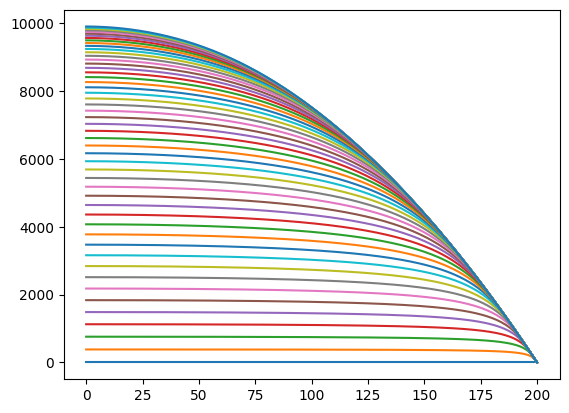

In [19]:
for i in range(0,51,1):
    plt.plot(values_table[i])

In [23]:
# show the expected value for Time 20 and State 20
print(f"Expected value for state 20 time 20: {values_table[20][20]}")
print(f"Best Action for state 20 time 20: {optimal_actions[20][20]}")

Expected value for state 20 time 20: 6149.632661720949
Best Action for state 20 time 20: 315


### Simulation of 1000 runs for the obtained policy with backward induction table

In [33]:
final_rewards: list = []
for i in range(1000):
    current_state: int = initial_state
    reward: int = 0
    for time in time_stamps:
        best_action: int = optimal_actions[current_state][time]
        p_1 = probability_func(event = 1, action=best_action, time=time)
        event: int = simulate_event(p_1) # Whether to sell or not to sell.
        reward += reward_function(event=event, state=current_state, action=best_action)
        current_state = new_state(event=event, state=current_state) # Change of number of tickets as per the event.

    final_rewards.append(reward)

### Visualizing the results

Text(0, 0.5, 'Total Rewards')

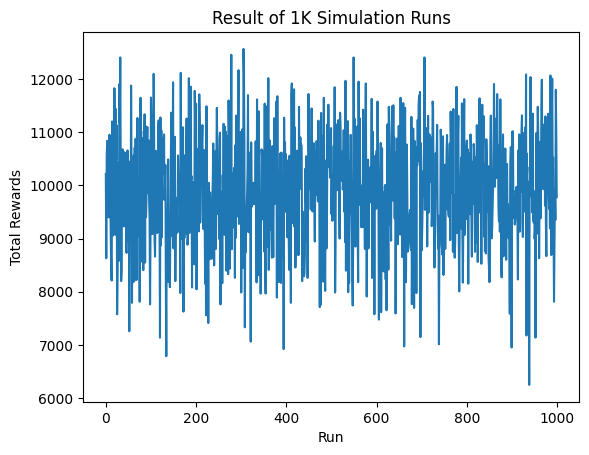

In [35]:
plt.plot(final_rewards)
plt.title("Result of 1K Simulation Runs")
plt.xlabel("Run")
plt.ylabel("Total Rewards")

### Observations
- We can see that the total rewards for each simulation on an average lies from the range of 9k to 11k